In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller

import scipy.stats as st
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [32]:
data = pd.read_csv('Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:300,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

In [33]:
def plot_graphs(y, num_lags, acf_only=None):
    if not acf_only:
        plt.plot(y)
        plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags,method="ols")
    plt.show()

In [34]:
def statistics(y): 
    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kur = kurtosis(y)
    skewness = skew(y)
    return {'mean': mean, 'std': std, 'kur': kur, 'skewness': skewness}

In [35]:
def adf(y):
    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)
    adf_test = adfuller(y,maxlag=10) 
    print("ADF test for the original series")
    print("Statistic Value:" , adf_test[0])
    print("p-value:" , adf_test[1])

In [36]:
import scipy.stats as st
import seaborn as sns
def hist(y, mean, std):
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)
    
    plt.show()

In [37]:
from scipy.stats import shapiro
def shap(y):
    # Normality test
    saphiro = shapiro(y)
    
    print("Saphiro",saphiro)

In [38]:
import statsmodels.api as sm
def box_test(y, lags):
    #Correlation test
    result = sm.stats.acorr_ljungbox(y, lags=[lags])
    return result

# Series 3

In [39]:
y = series3

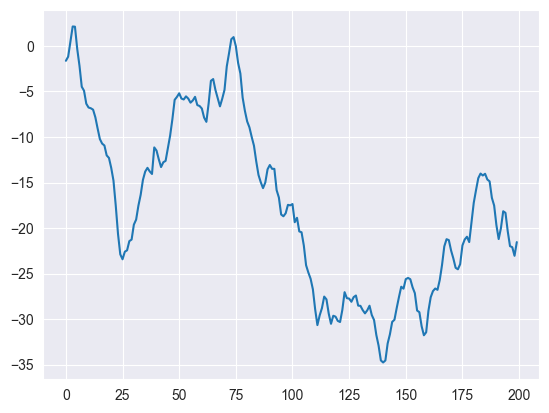

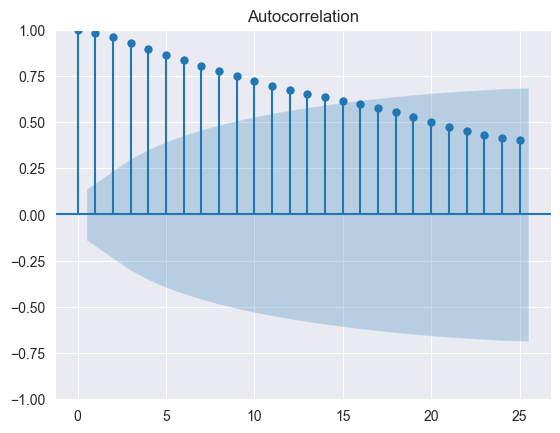

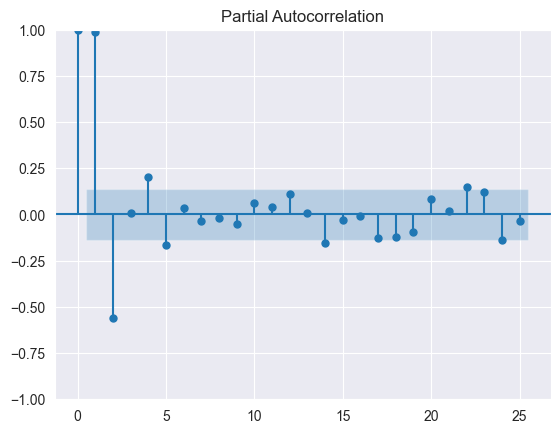

In [40]:
plot_graphs(y, 25)

In [41]:
stats = statistics(y)
stats

{'mean': -17.587934999999998,
 'std': 9.54356995053607,
 'kur': -1.0905794992729354,
 'skewness': 0.17555319900096092}

In [42]:
adf(y)

ADF test for the original series
Statistic Value: -2.2798069340153977
p-value: 0.1785633617827283


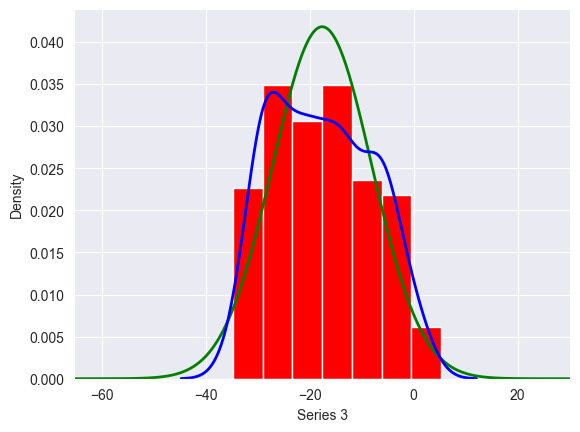

In [43]:
hist(y, mean=stats['mean'], std=stats['std'])

In [44]:
shap(y)

Saphiro ShapiroResult(statistic=0.9596958160400391, pvalue=1.8338014342589304e-05)


In [45]:
box_test(y, 20)

,lb_stat,lb_pvalue
20,2316.997946,0.0


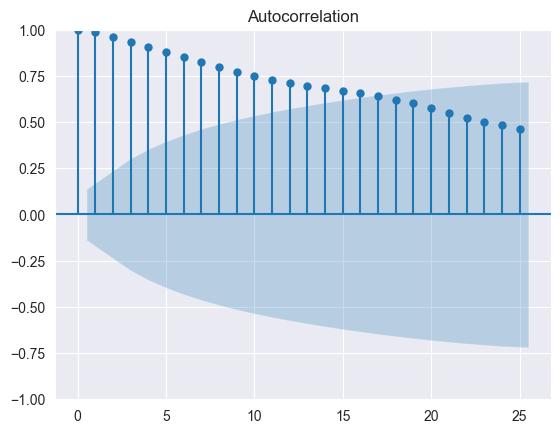

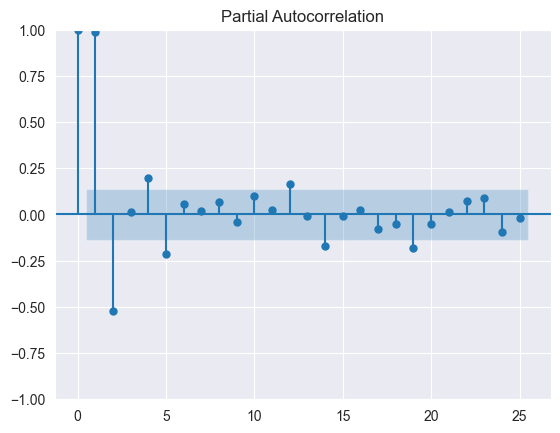

In [46]:
plot_graphs(y**2, 25, acf_only=True)

In [47]:
box_test(y**2, 20)

,lb_stat,lb_pvalue
20,2517.027824,0.0


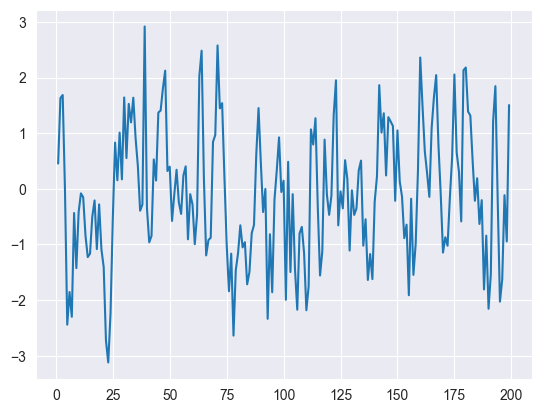

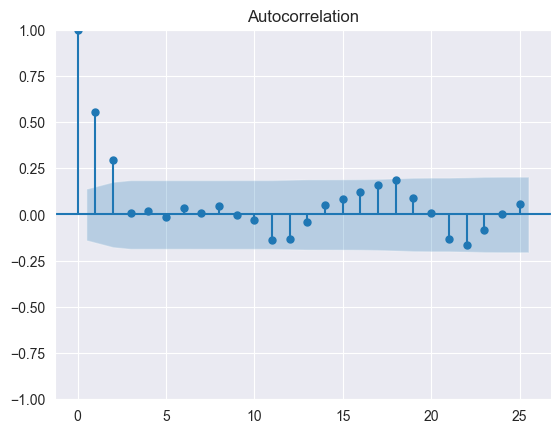

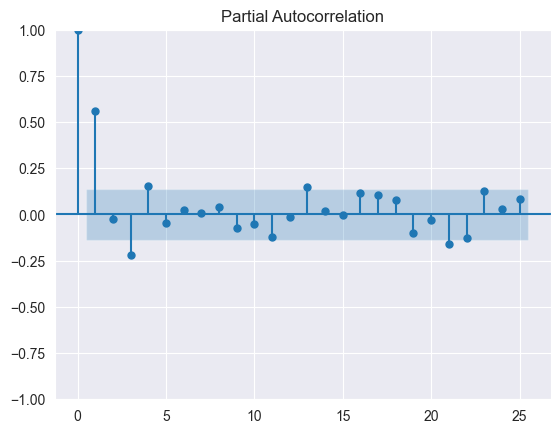

In [48]:
z = y.diff().dropna()
plot_graphs(z, 25)

In [49]:
stats = statistics(z)
stats

{'mean': -0.10007035175879396,
 'std': 1.2028018776422305,
 'kur': -0.4654580806034616,
 'skewness': 0.08853947614965339}

In [50]:
adf(z)

ADF test for the original series
Statistic Value: -5.598150604696636
p-value: 1.2828917110255257e-06


In [51]:
print('Ljung-Box for z')
box_test(z,20)

Ljung-Box for z


,lb_stat,lb_pvalue
20,108.979595,3.013443e-14


In [52]:
print("Ljung-Box for z**2")
box_test(z**2, 20)

Ljung-Box for z**2


,lb_stat,lb_pvalue
20,37.078309,0.011452


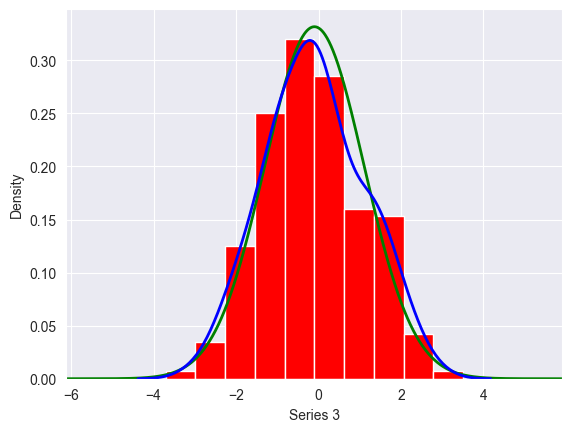

In [53]:
hist(z,mean=stats['mean'], std=stats['std'])

In [54]:
shap(z)

Saphiro ShapiroResult(statistic=0.9930403828620911, pvalue=0.4695647358894348)


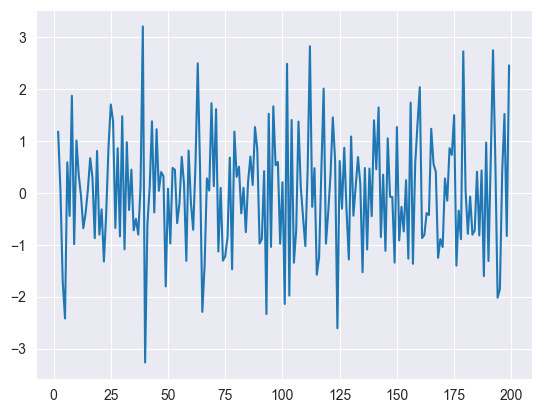

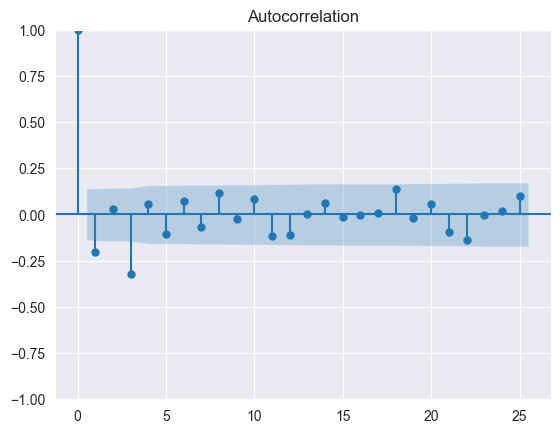

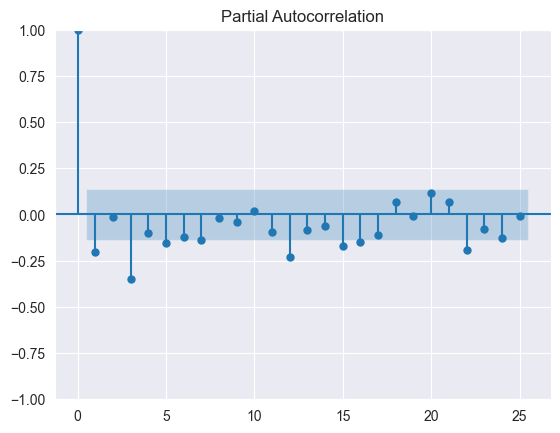

In [55]:
zz = y.diff(1).diff(1).dropna()
plot_graphs(zz, 25)

In [56]:
adf(zz)

ADF test for the original series
Statistic Value: -8.353011508583272
p-value: 2.959722708827507e-13


In [57]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,50.278971,0.000202


In [58]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,8.09901,0.991192


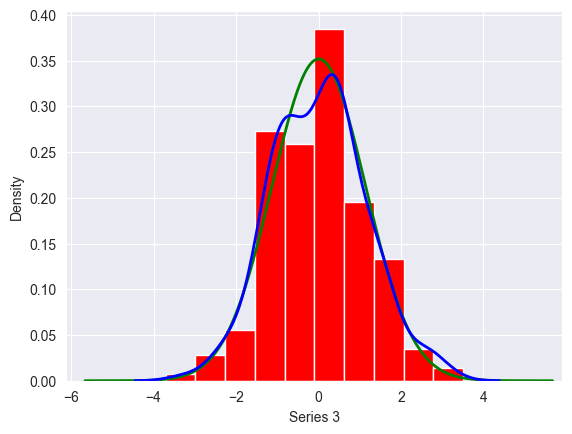

In [59]:
hist(zz,mean=stats['mean'], std=stats['std'])

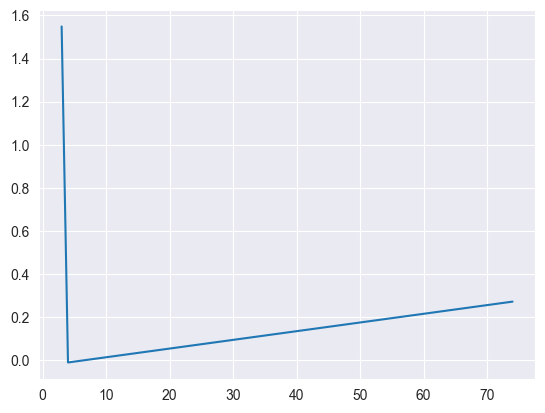

IndexError: index 1 is out of bounds for axis 0 with size 1

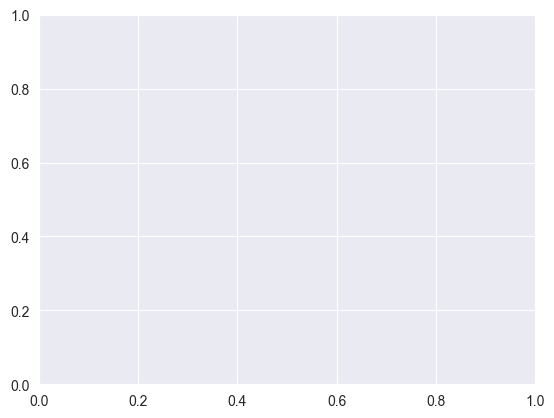

In [68]:
returns = np.log(y).diff().dropna() # we take log first and then one differente, diff(log(spot))
zz = returns
num_lags = 0
plot_graphs(zz, num_lags=num_lags)

In [ ]:
adf(zz)

In [ ]:
print('Ljung-Box for zz')
box_test(zz,20)

In [ ]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

In [ ]:
hist(zz,mean=stats['mean'], std=stats['std'])

In [ ]:
shap(zz)